# 1 Import libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import nan, isnan

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\anant'

In [4]:
os.chdir('C:\\GreatLearning\\MiniProjects\\Project 3-2-1\\Project 3')

In [5]:
os.getcwd()

'C:\\GreatLearning\\MiniProjects\\Project 3-2-1\\Project 3'

In [4]:
zomoto_df = pd.read_csv('zomoto.csv')

# 2
Top restaurant chains based on distribution.

Presume that we are talking about the number of restaurants these chains have

In [7]:
zomoto_df.groupby(["name"])["name"].count().sort_values(ascending = False).head(10)

name
Cafe Coffee Day              18
Onesta                       17
Keventers                    17
McDonald's                   16
SGS Non Veg - Gundu Pulav    16
Baskin Robbins               16
The Chocolate Heaven         16
Mad Over Donuts              15
Tata Cha                     15
Petoo                        15
Name: name, dtype: int64

# 3
Restaurants that do not take online orders

In [8]:
zomoto_df[zomoto_df["online_order"] == 'No'][["name", "online_order"]]

,name,online_order
0,Shree Ranga Vilas,No
1,Sphyre - Gateway Hotel,No
2,Popular Bakery,No
3,Thai & Chinese Fast Food,No
4,Grill On Wheels,No
...,...,...
9991,White Horse,No
9994,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Delight,No
9996,24 Hours Cake Delivery,No
9997,TBC- Sky Lounge,No


# 4

Restaurants that provide table booking vs the ones that do not

In [9]:
print("Count of restaurants that provide table bookings is: ")
print(zomoto_df[zomoto_df['book_table'] == 'Yes']['book_table'].count())

print("Count of restaurants that do not provide table bookings is: ")
print(zomoto_df[zomoto_df['book_table'] == 'No']['book_table'].count())

print("Their ratio is:")
print(zomoto_df[zomoto_df['book_table'] == 'Yes']['book_table'].count() / zomoto_df[zomoto_df['book_table'] == 'No']['book_table'].count())

Count of restaurants that provide table bookings is: 
1246
Count of restaurants that do not provide table bookings is: 
8754
Their ratio is:
0.14233493260223898


In [10]:
zomoto_df.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


# 5
Use a boxplot on the rating column. Use a user defined function or a lambda function or apply a function to get the data that comes before

In [11]:
sns.set_style('dark')

### Define a lambda function to get the numeric only values from the rating to facilitate box plot

In [12]:
# valid_ratings = lambda zdf: [float(i.split('/')[0].strip()) for i in zomoto_df["rate"] if i == i and i != 'NEW' and i != '-']

valid_ratings = lambda zdf: [float(str(i).split('/')[0].strip().replace("NEW", "0").replace("nan", "0").replace("-", "0")) for i in zomoto_df["rate"]]# if i == i and i != 'NEW' and i != '-']
print(len(valid_ratings(zomoto_df["rate"])))

10000


### Iterate on each lambda function and invoke the function to get the calculated value

[]

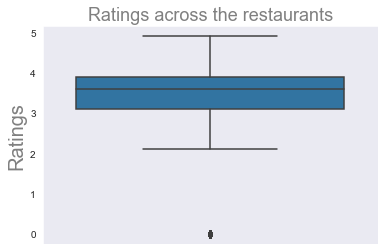

In [13]:
sns.boxplot(y=valid_ratings(zomoto_df)),#, y = "votes", data=zomoto_df)
# sns.boxplot(y=get_numeric_rating(zomoto_df["rate"]))
sns.set(rc={"figure.figsize":(25, 50)})
plt.title('Ratings across the restaurants', color='grey', weight='normal', size=18)
plt.ylabel('Ratings', color='grey', size=20)
plt.plot()

# 6
Online and Offline orders percentage

In [14]:
print("Percentage of restaurants that provide online orders is: ")
print((zomoto_df[zomoto_df['online_order'] == 'Yes']['online_order'].count() / zomoto_df['online_order'].count()) * 100)

print("Percentage of restaurants that do not provide online orders is: ")
print((zomoto_df[zomoto_df['online_order'] == 'No']['online_order'].count() / zomoto_df['online_order'].count()) * 100)



Percentage of restaurants that provide online orders is: 
59.43000000000001
Percentage of restaurants that do not provide online orders is: 
40.57


# 7
Plot the scatter plot using Cost vs rating variable with respect to online order. 
Use apply function or other function to remove the ","

### Function for getting numeric rating only for the restaurants
(Replaced the non numeric and NaN values with 0)

In [15]:
# print(len(zomoto_df[zomoto_df["rate"]=='NEW']))

def get_numeric_rating(c):
    return float(str(c).replace("NEW", "0").replace("-", "0").replace("nan", "0").split('/')[0].strip())


### Function for getting cost without ","

In [16]:
def get_numeric_cost(f):
    return float(str(f).replace(",",""))


### Scatter plot with ratings in the x axis and cost in the y axis using the above defined functions

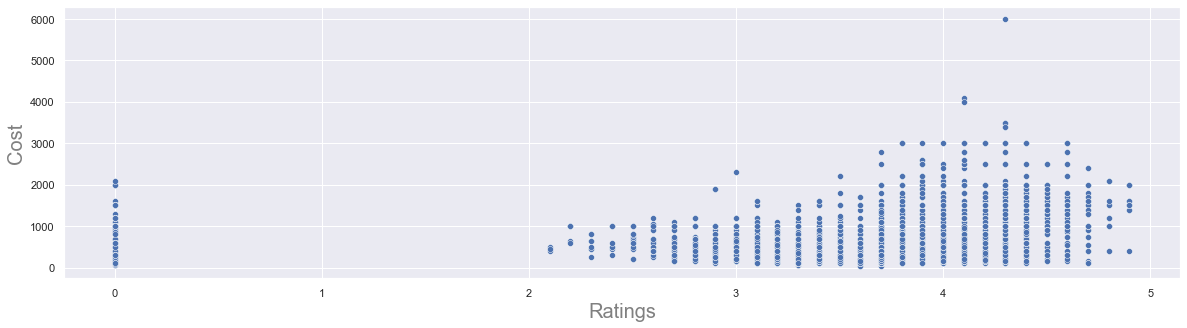

In [17]:
sns.set(rc={"figure.figsize":(20, 5)})
plt.ylabel('Cost', color='grey', size=20)
plt.xlabel('Ratings', color='grey', size=20)
# print(vnr)
sns.set_style("white")
sns.scatterplot(x=zomoto_df["rate"].apply(get_numeric_rating), y=zomoto_df["approx_cost(for two people)"].apply(get_numeric_cost), legend = "full")
plt.show()

# 8
Find the distribution of the votes and Approx_cost using a user-defined function and for a loop. 

In [18]:
### User defined function that uses for loop to get the rating and cost without ","
def get_numeric_rating_for(ratings):
    numeric_ratings = []
    for r in ratings:
        numeric_ratings.append(float(str(r).replace("NEW", "0").replace("-", "0").replace("nan", "0").split('/')[0].strip()))
    return numeric_ratings

def get_numeric_cost_for(cost):
    numeric_cost = []
    for c in cost:
        numeric_cost.append(float(str(c).replace(",","")))
    return numeric_cost
# nr = get_numeric_rating_for(zomoto_df["rate"])
# print(len(nr))
# nc = get_numeric_cost_for(zomoto_df["approx_cost(for two people)"])
# print(len(nc))

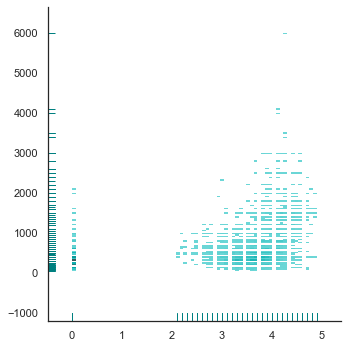

In [19]:
sns.displot(rug=True,
            x=get_numeric_rating_for(zomoto_df["rate"]), 
            y=get_numeric_cost_for(zomoto_df["approx_cost(for two people)"]),
            color="teal",)
plt.show()

# 9, 11
Most common restaurant type in Bangalore

In [20]:

zomoto_df.groupby('rest_type')['rest_type'].count().sort_values(ascending = False).head(1)

rest_type
Quick Bites    3625
Name: rest_type, dtype: int64

# 10

Is there a difference between the votes of restaurants accepting and not accepting online orders

What we do:
Get the average votes of the restaurants that take and not take online orders and see the difference

In [21]:
print('Average votes for all the restaurants taking online orders')
avg_vote_online = zomoto_df[zomoto_df['online_order'] == 'Yes']['votes'].mean()

print('Average votes for all the restaurants not taking online orders')
avg_vote_offline = zomoto_df[zomoto_df['online_order'] == 'No']['votes'].mean()

online_vote_pct = avg_vote_online / (avg_vote_online + avg_vote_offline) * 100
offline_vote_pct = avg_vote_offline / (avg_vote_online + avg_vote_offline) * 100

if (online_vote_pct > offline_vote_pct):
    s1 = 'online order restaurants'
    s2 = 'offline only order restaurants'
else:
    s2 = 'online order restaurants'
    s1 = 'offline only order restaurants'

if (abs(online_vote_pct - offline_vote_pct) == 0):
    margin = 'equal to'
else:
    if (abs(online_vote_pct - offline_vote_pct) < 10):
        margin = 'marginally better than'
    elif (abs(online_vote_pct - offline_vote_pct) < 50):
        margin = 'reasonably better than'
    elif (abs(online_vote_pct - offline_vote_pct) > 50):
        margin = 'largely better than'
    
print(s1, "are rated", margin, s2)

Average votes for all the restaurants taking online orders
Average votes for all the restaurants not taking online orders
online order restaurants are rated marginally better than offline only order restaurants


# 12 Best budget restaurants
How is it calculated?
Get the cost for two people and the rating of the restaurants
Sort the data by lowest cost to highest and then sort again by rating highest to lowest
Ignore the restaurants that are not yet rated
Get only the top 10 restaurants

In [22]:
zomoto_df[zomoto_df["rate"] != 'NEW'].sort_values(by = ["approx_cost(for two people)", "rate"], ascending = [True, False])[["url", "name", "rate", "approx_cost(for two people)"]].head(10)

,url,name,rate,approx_cost(for two people)
4682,https://www.zomato.com/bangalore/house-of-comm...,House Of Commons,4.8/5,"1,000"
5403,https://www.zomato.com/bangalore/house-of-comm...,House Of Commons,4.8/5,"1,000"
6729,https://www.zomato.com/bangalore/tbc-sky-loung...,TBC Sky Lounge,4.7/5,"1,000"
2477,https://www.zomato.com/bangalore/house-of-comm...,House Of Commons,4.7 /5,"1,000"
4903,https://www.zomato.com/bangalore/house-of-comm...,House Of Commons,4.7 /5,"1,000"
7511,https://www.zomato.com/bangalore/house-of-comm...,House Of Commons,4.7 /5,"1,000"
9739,https://www.zomato.com/bangalore/house-of-comm...,House Of Commons,4.7 /5,"1,000"
6749,https://www.zomato.com/bangalore/galitos-banne...,Galito's,4.6/5,"1,000"
6379,https://www.zomato.com/bangalore/galitos-banne...,Galito's,4.6 /5,"1,000"
2528,https://www.zomato.com/bangalore/gillys-restob...,Gilly's Restobar,4.5/5,"1,000"


# 13
Top quick bites restaurant type in Bangalore

In [7]:
zomoto_df[zomoto_df["rest_type"].str.contains("Quick Bites", na=True)][["url", "rate", "address", "rest_type",'name']].sort_values(by=["rate"], ascending = False).head(20)

,url,rate,address,rest_type,name
5909,https://www.zomato.com/bangalore/khiche-chale-...,NEW,"11, Eat Street, 80 Feet Road, Opposite Indian ...",Quick Bites,Khiche Chale Aao
1300,https://www.zomato.com/bangalore/sri-durga-fas...,NEW,"20, Ejipura, Bangalore",Quick Bites,Sri Durga Fast Food
5648,https://www.zomato.com/bangalore/gr-foods-btm-...,NEW,"23E, 1St Main Road, Maruthi Nagar, Madiwala, B...",Quick Bites,GR Foods
9316,https://www.zomato.com/bangalore/tasty-restaur...,NEW,"3, SR Complex, Arekere Mico Layout, JP Nagar, ...",Quick Bites,Tasty Restaurant
1287,https://www.zomato.com/bangalore/milkyway-ice-...,NEW,"Shop K-04, 1st Floor, Ascendas Park Square Mal...",Quick Bites,Milkyway Ice Creams & Fast Food
4658,https://www.zomato.com/bangalore/chilli-park-3...,NEW,"3rd Cross, Neeladri Nagar, Phase-1, Electronic...",Quick Bites,Chilli Park
4685,https://www.zomato.com/bangalore/pr-kitchen-wh...,NEW,"55, Sapthagiri Layout, Government College Road...",Quick Bites,PR Kitchen
2744,https://www.zomato.com/bangalore/cafe-sulaiman...,NEW,"Bharathi Layout, SG Palya, Srinivasa Theatre, ...",Quick Bites,Cafe Sulaimani
1243,https://www.zomato.com/bangalore/rs-shiv-sagar...,NEW,"62, 80 Feet Road, RMV 2nd Stage, Near M S Rama...",Quick Bites,RS Shiv Sagar Express
496,https://www.zomato.com/bangalore/risalo-restau...,NEW,"Sy. 74, Near Narayana PU College, BEML Layout,...",Quick Bites,Risalo Restaurant


# 14
Which are the most popular casual dining restaurant chains, Make use of any plot related to this question? 

zomoto_df["rate"] == zomoto_df["rate"] will remove NaN values as these are not comparable

Picking the top 25 restaurants

In [24]:
def get_numeric_rating_for(ratings):
    numeric_ratings = []
    for r in ratings:
        numeric_ratings.append(float(str(r).replace("NEW", "0").replace("-", "0").replace("nan", "0").split('/')[0].strip()))
    return numeric_ratings

cd = zomoto_df[(zomoto_df["rest_type"].str.contains("Casual")) & (zomoto_df["rate"] != 'NEW') & (zomoto_df["rate"] != '-') & (zomoto_df["rate"] == zomoto_df["rate"])].sort_values(by = "rate", ascending=False)
cd["rate"] = get_numeric_rating_for(cd["rate"])

top_cd = cd.sort_values(by = "rate", ascending = False).head(50)

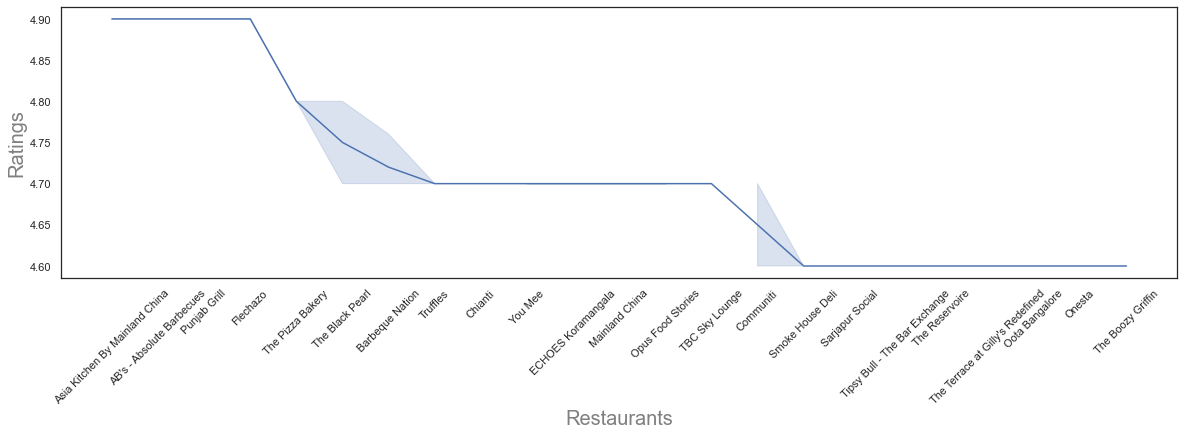

In [25]:
plt.ylabel('Ratings', color='grey', size=20)
plt.xlabel('Restaurants', color='grey', size=20)
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (15,10)
plt.xticks(range(len(top_cd)),rotation=45)
sns.lineplot(x="name", y="rate", data=top_cd)
plt.show()


# 15

Which are the most popular cuisines of Bangalore using a related plot?

In [26]:
rate_n = zomoto_df["rate"].apply(get_numeric_rating)
print(rate_n)

0       3.2
1       3.6
2       3.7
3       3.4
4       0.0
       ... 
9995    4.9
9996    3.3
9997    4.4
9998    3.8
9999    3.7
Name: rate, Length: 10000, dtype: float64


Most popular cuisine is calculated using the average rating against each type of restaurants

In [27]:
rest_type_rate = zomoto_df[["rate", "rest_type"]]
numeric_rate = rest_type_rate["rate"].apply(get_numeric_rating)
rest_type_rate.insert(loc=2, column = "rate_num", value = numeric_rate, allow_duplicates = True)


In [48]:
rest_rate_categorized = rest_type_rate.groupby("rest_type").mean("rate_num").reset_index()
popular_rest_types = rest_rate_categorized.sort_values(by = "rate_num", ascending=False)
print(len(popular_rest_types))

82


In [52]:
popular_rest_types = popular_rest_types.head(10)
# popular_rest_types

10
10


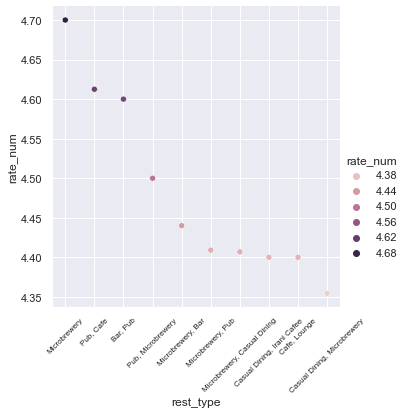

In [54]:
sns.set(rc={"figure.figsize":(50, 50)})
g = sns.relplot(x="rest_type", y="rate_num", hue="rate_num", kind="scatter", data=popular_rest_types)
# range(0, 50, 2)
value_tick = range(0, len(popular_rest_types))
print(len(value_tick))
# print(value_tick)
header_names = list(popular_rest_types["rest_type"])
print(len(header_names))
header_name_sel = [header_names[idx] for idx in range(0, len(value_tick))]
for ax in g.axes.flat:
    labels = ax.get_xticklabels()
    ax.set_xticks(ticks=value_tick)
    ax.set_xticklabels(fontsize = 8, rotation = 45, labels=header_name_sel)
plt.show()